Dataset shape: (537, 64)
Number of classes: 3
Classes loaded: [0 1 2]
Mean of centered data (first 5 features, approx 0): [ 0.00000000e+00 -9.82040850e-17  3.69991643e-15 -1.89544221e-15
 -9.92378123e-16]
Shape of U: (537, 64)
Shape of s (singular values): (64,)
Shape of V_T: (64, 64)
Shape of Principal Components matrix V: (64, 64)
Explained variance ratio by first 2 components: [0.31488779 0.18556129]
Cumulative variance ratio by first 2 components: 0.5004
Cumulative variance ratio by first 10 components: 0.8497


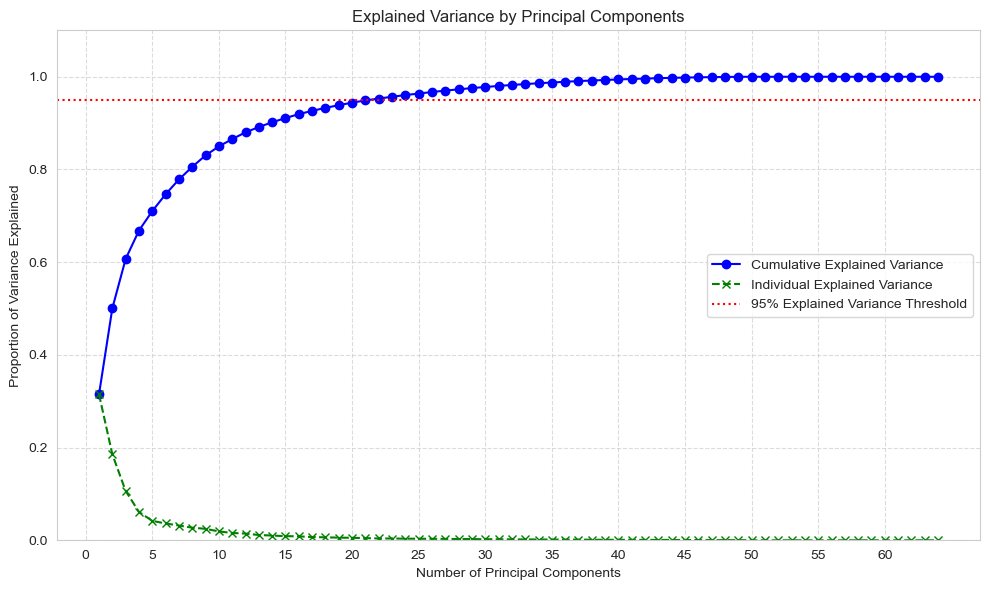

Shape of transformed data Z: (537, 2)


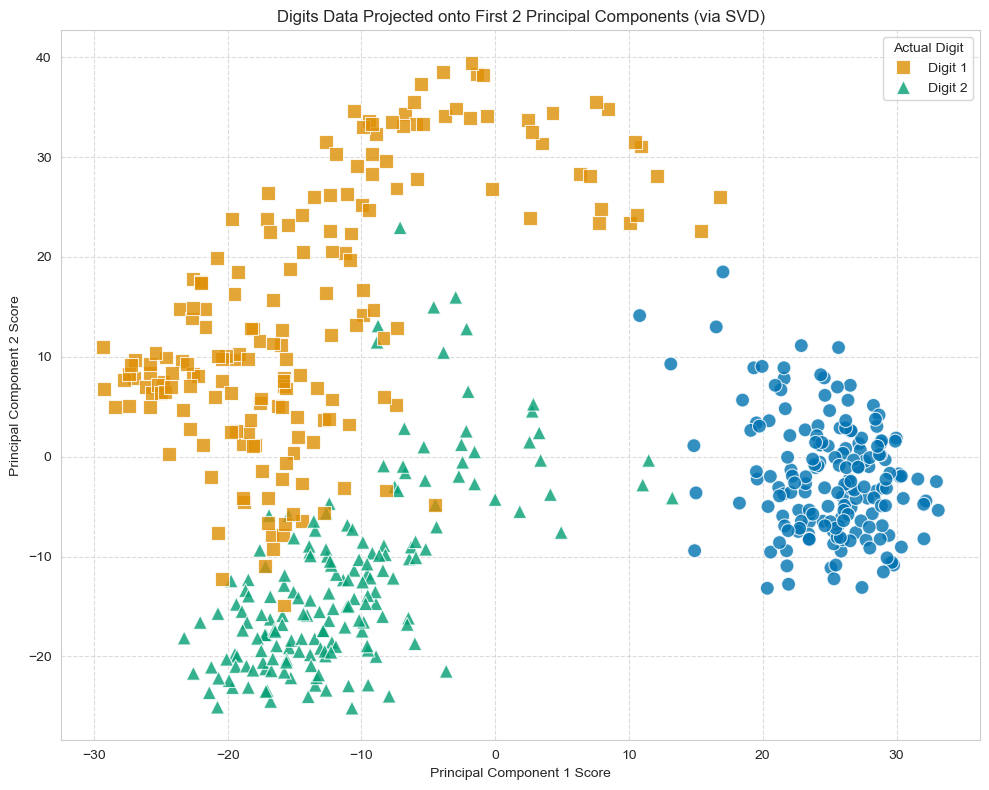

In [6]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_digits
from sklearn.preprocessing import StandardScaler

# LoadingPreparing Data
digits = load_digits(n_class=3)
X = digits.data  
y = digits.target  
n_samples, n_features = X.shape
target_names = digits.target_names

print(f"Dataset shape: {X.shape}")
print(f"Number of classes: {len(np.unique(y))}")
print(f"Classes loaded: {np.unique(y)}")

# 2. Centering Data Using Standard Scaler to center the data (mean=0)
scaler = StandardScaler(with_std=False)
X_centered = scaler.fit_transform(X)
print(f"Mean of centered data (first 5 features, approx 0): {np.mean(X_centered, axis=0)[:5]}")

# 3. Calculating SVD
# Apply SVD to the centered data
# np.linalg.svd returns U, s (singular values), V_T (V transpose)
U, s, V_T = np.linalg.svd(X_centered, full_matrices=False)

# V_T contains principal component directions as rows.
# Transpose V_T to get principal components as columns (V)
principal_components_V = V_T.T

print(f"Shape of U: {U.shape}")
print(f"Shape of s (singular values): {s.shape}")
print(f"Shape of V_T: {V_T.shape}")
print(f"Shape of Principal Components matrix V: {principal_components_V.shape}")

# 4. Calculate Variance Explained
# Variance explained by each component
# Use (n_samples - 1) for sample variance correction
explained_variance = (s**2) / (n_samples - 1)
total_variance = np.sum(explained_variance)
explained_variance_ratio = explained_variance / total_variance
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

print(f"Explained variance ratio by first 2 components: {explained_variance_ratio[:2]}")
print(f"Cumulative variance ratio by first 2 components: {cumulative_explained_variance[1]:.4f}")
print(f"Cumulative variance ratio by first 10 components: {cumulative_explained_variance[9]:.4f}")

# 5. Generate Plot 1 Explained Variance Plot ---
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o', linestyle='-', color='blue', label='Cumulative Explained Variance')
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='x', linestyle='--', color='green', label='Individual Explained Variance')

plt.axhline(y=0.95, color='red', linestyle=':', label='95% Explained Variance Threshold')

plt.title('Explained Variance by Principal Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Proportion of Variance Explained')
plt.xticks(np.arange(0, n_features + 1, 5)) # Adjust ticks for clarity
plt.ylim(0, 1.1) # Ensure y-axis goes slightly above 1.0
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(loc='center right')
plt.tight_layout() # Adjust layout
plt.show()


# 6. Select Components (k=2 for visualization)
k = 2
V_k = principal_components_V[:, :k] # First k columns of V

# 7. Transforming the Data
# Project centered data onto the first k principal components
Z_pca = X_centered @ V_k # Resulting data Z (n_samples x k)
print(f"Shape of transformed data Z: {Z_pca.shape}")


# 8. Plot 2: Scatter Plot of Transformed Data
markers = ["o", "s", "^"]

plt.figure(figsize=(10, 8))

# Use of seaborn's scatterplot with a colorblind-friendly palette and specific markers
scatter = sns.scatterplot(
    x=Z_pca[:, 0],             # PC1 scores
    y=Z_pca[:, 1],             # PC2 scores
    hue=y,                     # Color points by digit label (0, 1, 2)
    style=y,                   # Use different markers for digit label (0, 1, 2)
    markers=markers,           # Specify the markers list
    palette='colorblind',      # Use a colorblind-friendly palette
    s=100,                     # Marker size
    alpha=0.8,                 # Marker transparency
    legend='full'
)

plt.title(f'Digits Data Projected onto First {k} Principal Components (via SVD)')
plt.xlabel('Principal Component 1 Score')
plt.ylabel('Principal Component 2 Score')
plt.grid(True, linestyle='--', alpha=0.7)

# Visible legend handles
handles, labels = scatter.get_legend_handles_labels()
new_labels = [f"Digit {label}" for label in labels[1:len(np.unique(y))+1]]
plt.legend(handles[1:len(np.unique(y))+1], new_labels, title='Actual Digit')

plt.tight_layout() # Adjust layout
plt.show()